`sketch001` is a really terrible notebook put together during the actual 1h hackathon/challenge.

it is awful because it barely has any structure and I've been away from this kind of things/code for almost a year and a half, which means I forgot some pretty basic stuff. but really really basic stuff.

this second notebook is my attempt to get (1) structure and (2) something working more or less quickly (ideally in under an hour). there is a version of a solution under `doc`, but I'll try not to pay any attention to that other than to copy all responses to start with tomorrow morning, right after my breakfast and before going to the wall for another 25 autobelay goes (or more). anyway, enough for tonight/today.

# Preparation

In [1]:
import pandas as pd
import scipy.spatial as spatial
import numpy as np
import matplotlib.pyplot as plt

import math

In [2]:
listings = pd.read_csv("./data/Edinburgh_AirBnb_listings_2.csv")
reviews = pd.read_csv("./data/Edinburgh_reviews_reduced.csv")

In [3]:
listings.head(3)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,Meadows and Southside,55.942646,-3.184670,Entire home/apt,115,2,04/11/2018,1.73,2,66
2,33821,Stunning Central Edinburgh Festival Entire Flat,146109,Iona,Broughton North and Powderhall,55.964772,-3.189864,Entire home/apt,85,2,28/08/2018,2.02,2,122


In [4]:
reviews.head(3)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,15420,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,19/04/2011,429751,Guido,I went to Edinburgh for the second time on Apr...


# Questions

## 1. How many listings are there for each room type?

![question 1](img/question01.png)

In [5]:
listings.room_type.value_counts()

Entire home/apt    7366
Private room       4582
Shared room          37
Name: room_type, dtype: int64

## 2. What is the average price for Listings in each neighbourhood?

![question 2](img/question02.png)

In [6]:
avg_prices = listings[['neighbourhood', 'price']].groupby(by='neighbourhood').mean()

#print(avg_prices.loc['Abbeyhill'])
avg_prices

,price
neighbourhood,
Abbeyhill,84.635870
Baberton and Juniper Green,81.928571
Balerno and Bonnington Village,68.866667
Balgreen and Roseburn,70.413333
"Barnton, Cammo and Cramond South",106.750000
"Bingham, Magdalene and The Christians",56.000000
"Blackford, West Mains and Mayfield Road",74.518182
Blackhall,76.363636
Bonaly and The Pentlands,79.777778


## 3. What is the distribution of minimum nights by room type?

![question 3](img/question03.png)

room_type
Entire home/apt    [[Axes(0.125,0.125;0.775x0.755)]]
Private room       [[Axes(0.125,0.125;0.775x0.755)]]
Shared room        [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

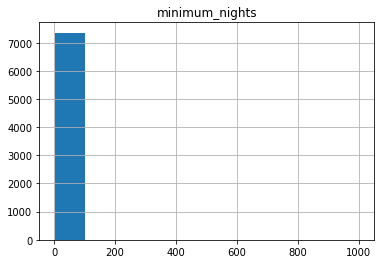

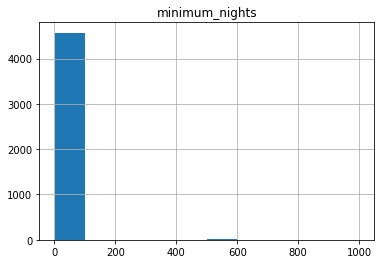

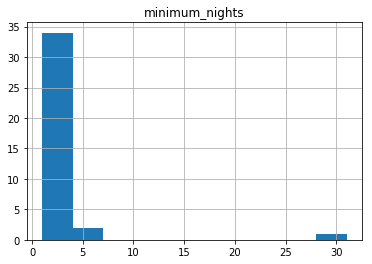

In [7]:
listings[['room_type', 'minimum_nights']].groupby('room_type').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1156a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f573630>]], dtype=object)

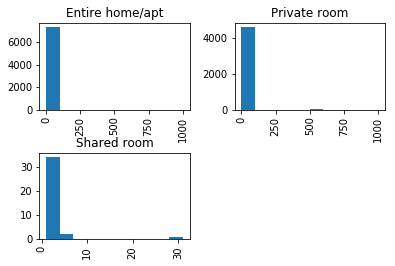

In [8]:
listings[['room_type', 'minimum_nights']].hist(by='room_type', bins=10)

But the choice plots in the answer are between 0 and 20.

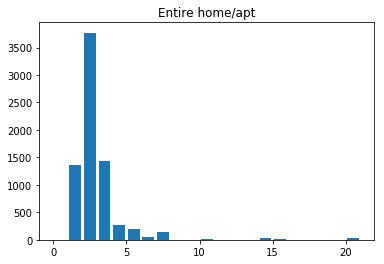

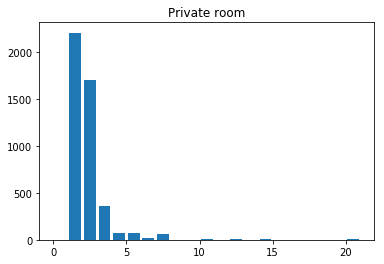

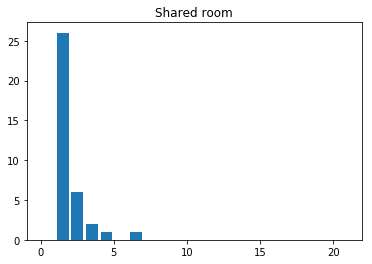

In [9]:
bins = np.linspace(0,21,22)
for room_type in listings.room_type.unique():
    hist, bin_edges = np.histogram(listings['minimum_nights'][listings.room_type == room_type], bins)
    plt.figure()
    plt.bar(((bins[:-1] + bins[1:])/2), hist)
    plt.title(room_type)

I could have also used subplots and selected the different axes for each room type, via `plt.sca`.

## 4. How does the mean price of listings vary with the number of listings for each host?

(It took me 20 minutes to get here, with some help looking at the `matplotlib` functions).

![question 4](img/question04.png)

In [10]:
data_listings = listings[['host_id', 'price']]
listings_number = data_listings.groupby('host_id').count()
listings_price = data_listings.groupby('host_id').mean()

In [11]:
mean_price_and_count = pd.merge(listings_price, listings_number,
                                left_index=True, right_index=True,
                                suffixes=('_mean', '_count'))

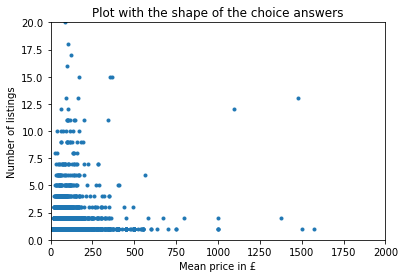

In [12]:
plt.plot(mean_price_and_count['price_mean'],
        mean_price_and_count['price_count'],
        '.')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.xlabel('Mean price in £')
plt.ylabel('Number of listings')
plt.title('Plot with the shape of the choice answers');

The Pandas version I was using until now was a bit outdated (`0.20.1` as per `pd.__version__`). This means that `merge` doesn't work on named Series, which explains why my code is different than the suggested solution.

**May 5, 2017**, go figure. That must be the last time I did something "for real" with Pandas.

Paused to update Pandas here and sync the environment on my desktop as well. Now I have Pandas `0.24.0` and both the previous code and the newer one (below and easier to read) work.

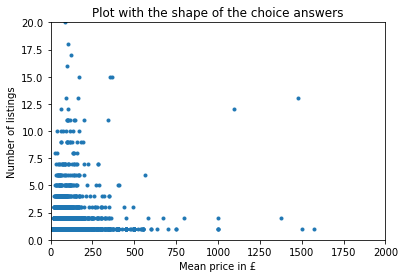

In [13]:
mean_price_and_count = pd.merge(listings_price, listings_number,
                                left_on="host_id", right_on="host_id",
                                suffixes=('_mean', '_count'))

plt.plot(mean_price_and_count['price_mean'],
        mean_price_and_count['price_count'],
        '.')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.xlabel('Mean price in £')
plt.ylabel('Number of listings')
plt.title('Plot with the shape of the choice answers');

# 5. What is the cumulative percentage of the number of listings per host, ranked from most to fewest?

27 minutes to go. This is after my break to update the environment and... prepare for climbing. I might continue from the wall.

I also prepared all the questions (copied them here) to avoid looking at the solved doc from now on.

![question 5](img/question05.png)

This question is about the cumulative percentage of the number of listings itself (how many 1, 2, 3, etc. listings are there).

In [14]:
listings_per_host = listings[['host_id',
                              'listing_id']].groupby('host_id').count().sort_values('listing_id', ascending=False)

The following sticks to the letter of the question (ranked from most to fewest times said number of listings per host takes place).

In [15]:
cumsum_listings_per_host = listings_per_host['listing_id'].value_counts().sort_values(ascending=False).cumsum()
pd.DataFrame({'cumulative': 100* cumsum_listings_per_host/cumsum_listings_per_host.iloc[-1]})

,cumulative
1,82.338022
2,94.039659
3,96.944893
4,98.224579
5,98.743371
6,99.031589
7,99.308278
9,99.446622
11,99.550380
10,99.631081


The following sticks to a different interpretation of the question (ranked from most to fewest number of listings).

In [16]:
cumsum_listings_per_host = listings_per_host['listing_id'].value_counts().sort_index(ascending=False).cumsum()
pd.DataFrame({'cumulative': 100* cumsum_listings_per_host/cumsum_listings_per_host.iloc[-1]})

,cumulative
98,0.011529
84,0.023057
72,0.034586
50,0.046115
37,0.057644
36,0.069172
33,0.080701
32,0.092230
27,0.103758
25,0.115287


What the answer slides point to is a fewest to most number of listings interpretation, which in reality is NOT what was asked for, even if the first set of values match and work for the expected answer).

In [17]:
cumsum_listings_per_host = listings_per_host['listing_id'].value_counts().sort_index(ascending=True).cumsum()
pd.DataFrame({'cumulative': 100* cumsum_listings_per_host/cumsum_listings_per_host.iloc[-1]})

,cumulative
1,82.338022
2,94.039659
3,96.944893
4,98.224579
5,98.743371
6,99.031589
7,99.308278
8,99.377450
9,99.515794
10,99.596495


## 6. For listings with at least one review, what is the average number of reviews per listing, grouped by price?

The question doesn't say so, but the choices are per room_type, as graphs (histogram with 10 bins).

![question 6](img/question06.png)

Just got to the half this question in the hour allotted.

In [18]:
num_reviews = reviews[['listing_id', 'review_id']].groupby('listing_id').count().rename(columns={'review_id': 'count'})
print(num_reviews.shape)
num_reviews.head(2)

(155, 1)


,count
listing_id,
15420,246
24288,172


In [19]:
listings_and_price_with_review = listings[['listing_id', 'price']][ listings.listing_id.isin(num_reviews.index)]
listings_and_price_with_review = pd.merge(listings_and_price_with_review,
                                          num_reviews,
                                          left_on='listing_id',
                                          right_on='listing_id')

listings_and_price_with_review.head()

,listing_id,price,count
0,15420,80,246
1,24288,115,172
2,33821,85,7
3,38628,46,44
4,44552,32,172


In [20]:
listings_with_reviews = pd.merge(listings, listings_and_price_with_review[['listing_id', 'count']].rename(columns={'count': 'num_reviews'}),
        left_on='listing_id', right_on='listing_id')

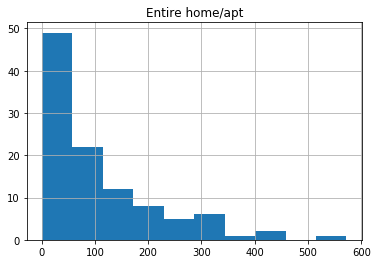

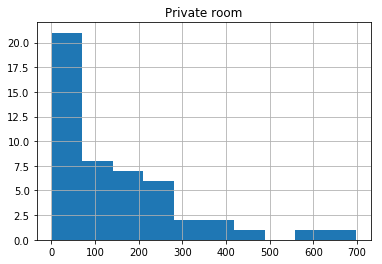

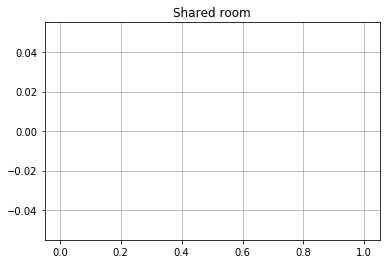

In [21]:
for room_type in listings.room_type.unique():
    reduced = listings_with_reviews[listings_with_reviews.room_type == room_type]

    reduced[['price', 'num_reviews']].hist('num_reviews')
    plt.title(room_type)

The above might seem a good idea, but there is no `num_reviews` average, just counts of instances of listings within a certain `num_reviews` bin.

So we do as below, the main difference being:
1. prices are mapped no numeric bins
2. `num_reviews` are averaged within those bins.

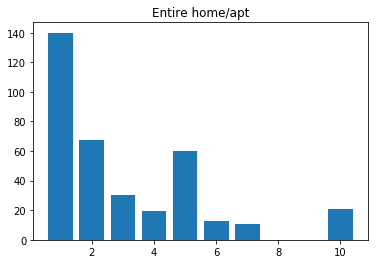

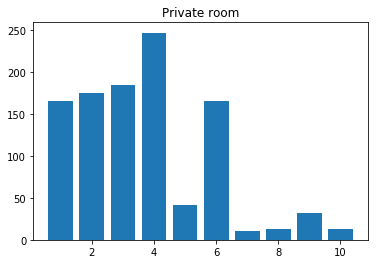

In [22]:
for room_type in listings.room_type.unique():
    # We will use copy to avoid pandas warnings about assignment to copies
    reduced = listings_with_reviews.loc[listings_with_reviews.room_type == room_type].copy()
    
    # There are room types without reviews
    if reduced.shape[0] > 0:
        # to match the choice plots
        bins = np.linspace(
                np.min(reduced.price),
                np.max(reduced.price),
                11
            )
        
        # binning
        reduced['bin'] = pd.cut(reduced['price'], bins)
        # mean of reviews number
        price_mean_by_bin = reduced[['bin', 'num_reviews']].groupby('bin').mean()
    
        plt.figure()
        plt.title(room_type)
        plt.bar(range(1,11), price_mean_by_bin.num_reviews)


## 7. For listings with at least one review, plot the number of reviews per listing by the listing’s longitude and latitude

![question 7](img/question07.png)

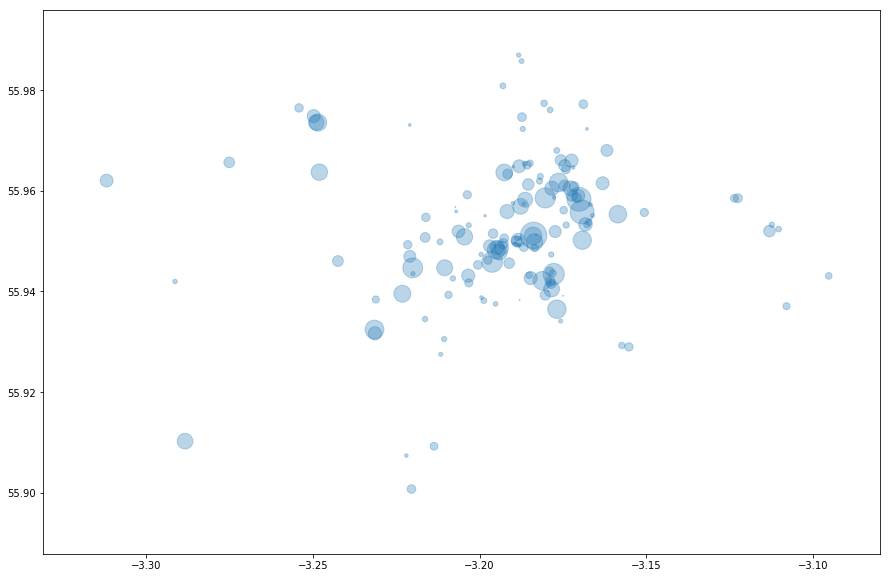

In [23]:
listings_with_reviews[['latitude','longitude', 'num_reviews']]

plt.figure(figsize=(15,10))
plt.scatter(x=listings_with_reviews.longitude,
            y=listings_with_reviews.latitude,
            s=listings_with_reviews.num_reviews,
           alpha=0.3);

## 8. What is the average length of review by property type?

![question 8](img/question08.png)

Maybe it took me an hour more to get to this question. That means the next answers don't count for timing purposes, even though they are still part of the exercise.

In [ ]:
reviews['length'] = reviews.apply(lambda x: len(x.comments), axis=1)
mean_length_by_listing = reviews[['listing_id', 'length']].groupby('listing_id').mean()

In [ ]:
# We could use listings_with_reviews, but there is no need nor noticeable speed gain
listings_and_comment_length = pd.merge(listings, mean_length_by_listing,
                                left_on='listing_id',
                                right_on='listing_id')
listings_and_comment_length.head(3)

Two different ways of obtaining the answer.

In [ ]:
listings_and_comment_length.groupby('room_type').mean()['length']

In [ ]:
listings_and_comment_length[['room_type', 'length']].groupby('room_type').mean()

The above code is wrong because it provides the average of the average comment length per listing, grouped by `room_type`. That is a double average, not what is being asked for. That's the reason `length_by_listing` has been renamed as `mean_length_by_listing`, to avoid any confusion.

Let's do it again.

In [24]:
reviews['length'] = reviews.apply(lambda x: len(x.comments), axis=1)
reviews.head(2)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,length
0,15420,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...,677
1,15420,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...,365


In [25]:
listings_and_comment_length = pd.merge(listings, reviews,
                                left_on='listing_id',
                                right_on='listing_id')
listings_and_comment_length.head(3)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_id,date,reviewer_id,reviewer_name,comments,length
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...,677
1,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...,365
2,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,232149,19/04/2011,429751,Guido,I went to Edinburgh for the second time on Apr...,557


Again, we use two different approaches

In [26]:
listings_and_comment_length.groupby('room_type').mean()['length']

room_type
Entire home/apt    333.369630
Private room       309.463877
Name: length, dtype: float64

In [27]:
listings_and_comment_length[['room_type', 'length']].groupby('room_type').mean()

,length
room_type,
Entire home/apt,333.369630
Private room,309.463877


## 9. For each host, what is their year-on-year percentage change in number of reviews since 2010?

![question 9](img/question09.png)

In [28]:
reviews['year'] = reviews.date.apply(lambda x: x.split('/')[-1])
reviews.head(2)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,length,year
0,15420,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...,677,2011
1,15420,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...,365,2011


In [29]:
listings_with_reviews.head(1)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,246


In [30]:
host_year_reviews = pd.merge(reviews, listings_with_reviews,
                    left_on='listing_id',
                    right_on='listing_id').groupby(['host_id', 'year']).count()['num_reviews']

In [31]:
host_year_reviews

host_id  year
33078    2011     1
         2012     6
         2013     4
         2014    10
         2015     6
         2016     3
         2017    14
         2018    33
46498    2010     3
         2011    29
         2012    32
         2013    24
         2014    19
         2015    14
         2016    23
         2017    53
         2018    19
60423    2011    10
         2012    14
         2013    13
         2014    40
         2015    30
         2016    46
         2017    52
         2018    41
146109   2018     7
165635   2014     3
         2015     2
         2016     8
         2017    12
                 ..
2823210  2016    22
         2017    22
         2018    46
2893359  2012     2
         2013    11
         2014    14
         2015     6
         2016     5
         2017     3
         2018     1
2916432  2012     8
         2013     8
         2015    13
         2018    46
2918371  2012     4
         2013    39
         2014    29
         2015    41
      

In [32]:
# This is the change from the previous year to the one in the column.

(100 * host_year_reviews.unstack(level=1).pct_change(axis='columns')).round(2)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
host_id,,,,,,,,,
33078,NaN,NaN,500.00,-33.33,150.00,-40.00,-50.00,366.67,135.71
46498,NaN,866.67,10.34,-25.00,-20.83,-26.32,64.29,130.43,-64.15
60423,NaN,NaN,40.00,-7.14,207.69,-25.00,53.33,13.04,-21.15
146109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165635,NaN,NaN,NaN,NaN,NaN,-33.33,300.00,50.00,58.33
173941,NaN,NaN,NaN,0.00,0.00,33.33,0.00,-75.00,500.00
188704,NaN,600.00,42.86,160.00,-53.85,0.00,-41.67,157.14,-88.89
195950,NaN,250.00,-59.52,-35.29,63.64,5.56,-10.53,-17.65,57.14
199204,NaN,NaN,85.71,51.28,-38.98,88.89,4.41,1.41,-11.11


In [33]:
# Relabeling the columns to make it clearer...
pcts = (100 * host_year_reviews.unstack(level=1).pct_change(axis='columns')).round(2)
pcts.columns=["{}-{}".format(int(year)-1, year) for year in pcts.columns]
pcts

,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
host_id,,,,,,,,,
33078,NaN,NaN,500.00,-33.33,150.00,-40.00,-50.00,366.67,135.71
46498,NaN,866.67,10.34,-25.00,-20.83,-26.32,64.29,130.43,-64.15
60423,NaN,NaN,40.00,-7.14,207.69,-25.00,53.33,13.04,-21.15
146109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165635,NaN,NaN,NaN,NaN,NaN,-33.33,300.00,50.00,58.33
173941,NaN,NaN,NaN,0.00,0.00,33.33,0.00,-75.00,500.00
188704,NaN,600.00,42.86,160.00,-53.85,0.00,-41.67,157.14,-88.89
195950,NaN,250.00,-59.52,-35.29,63.64,5.56,-10.53,-17.65,57.14
199204,NaN,NaN,85.71,51.28,-38.98,88.89,4.41,1.41,-11.11


Oh, I did a good one here. :D
The only doubt is what to do (how to represent) cases where there are not consecutive year reviews:
1. Is that -infinite or a +infinite?
2. Should some kind of marker be used?

## 10. What percentage of reviewers have only left reviews for one neighbourhood (out of those who left multiple reviews)?

![question 10](img/question10.png)

In [34]:
multireviewers = reviews.groupby('reviewer_id').nth(1).index
multireviews = reviews[reviews.reviewer_id.isin(multireviewers)]

In [35]:
listing_multireviewers = pd.merge(listings_with_reviews[['listing_id', 'neighbourhood']],
         multireviews[['listing_id', 'reviewer_id']],
         left_on='listing_id',
         right_on='listing_id').drop('listing_id', axis=1)
listing_multireviewers.head(3)

,neighbourhood,reviewer_id
0,"Old Town, Princes Street and Leith Street",183378
1,"Old Town, Princes Street and Leith Street",3879011
2,"Old Town, Princes Street and Leith Street",2026707


In [36]:
pct_1_nbh_reviewed = ( sum(listing_multireviewers.groupby('reviewer_id')['neighbourhood'].nunique() == 1)
                        / multireviews.reviewer_id.nunique() )

print("{:.2f}% of the reviewers reviewed just one neighbourhood".format(100*pct_1_nbh_reviewed))

61.81% of the reviewers reviewed just one neighbourhood


## 11. What percentage of hosts own listings with review lengths in the top 20% of review lengths?

![question 11](img/question11.png)

In [37]:
listings_and_comment_length.head(2)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_id,date,reviewer_id,reviewer_name,comments,length
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...,677
1,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...,365


In [38]:
host_id_plus_length = listings_and_comment_length.sort_values('length', ascending=False)[['host_id', 'length']]
host_id_plus_length = host_id_plus_length.reset_index().drop('index', axis=1)
num_hosts_20_longer_reviews = host_id_plus_length.iloc[0:round(.2*host_id_plus_length.shape[0])].host_id.nunique()

In [39]:
print("{:.1f}% of the hosts have reviews with the 20% top lengths".format(
    100*num_hosts_20_longer_reviews/listings.host_id.nunique()))

1.4% of the hosts have reviews with the 20% top lengths


## 12. What’s the average distance between listings for each neighbourhood?

![question 12](img/question12.png)

I used a couple of different approaches, after seeing that the first one (where the DataFrame is accessed constantly) is really slow as a result of the indirect access (heavyweight objects instead of just an array) and the wasteful squaring via `numpy`.

In [40]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    # All combinations:
    num_listings_per_loc = locs.shape[0];
    print("Calculating average distance for {} ({} listings)".format(n, num_listings_per_loc))
    for i in range(0,num_listings_per_loc-2):
        #print("from listing {}".format(i))
        lat0 = locs.iloc[i].latitude
        lon0 = locs.iloc[i].longitude
    
        for j in range(i+1,num_listings_per_loc-1):
            lat1 = locs.iloc[j].latitude
            lon1 = locs.iloc[j].longitude
        
            dists.append(np.sqrt(np.square(lat0 - lat1) + np.square(lon0 - lon1)))
    
    average_distances.append({'neighbourhood': n, 'avg_distance': sum(dists)/len(dists)})

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')

Calculating average distance for Old Town, Princes Street and Leith Street (821 listings)
Calculating average distance for Meadows and Southside (457 listings)
Calculating average distance for Broughton North and Powderhall (174 listings)
Calculating average distance for Joppa (75 listings)
Calculating average distance for South Leith (263 listings)
Calculating average distance for Meadowbank and Abbeyhill North (278 listings)
Calculating average distance for Canongate, Southside and Dumbiedykes (367 listings)
Calculating average distance for New Town West (287 listings)
Calculating average distance for Tollcross (608 listings)
Calculating average distance for Hillside and Calton Hill (422 listings)
Calculating average distance for Deans Village (554 listings)
Calculating average distance for New Town East and Gayfield (273 listings)
Calculating average distance for North Leith and Newhaven (159 listings)
Calculating average distance for Leith (Albert Street) (176 listings)
Calculating

In [41]:
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003027
Oxgangs,0.003161
Polwarth,0.003201
Marchmont West,0.003289
Canonmills and New Town North,0.003430


The above code was in two blocks to allow collapsing the debug output (which is useful to check in real time how long the whole process takes).

In [42]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    # All combinations:
    num_listings_per_loc = locs.shape[0];
    for i in range(0,num_listings_per_loc-2):
        #print("from listing {}".format(i))
        lat0 = locs.iloc[i].latitude
        lon0 = locs.iloc[i].longitude
    
        for j in range(i+1,num_listings_per_loc-1):
            lat1 = locs.iloc[j].latitude
            lon1 = locs.iloc[j].longitude
        
            dists.append(math.sqrt((lat0 - lat1)**2 + (lon0 - lon1)**2))
    
    average_distances.append({'neighbourhood': n, 'avg_distance': sum(dists)/len(dists)})

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003027
Oxgangs,0.003161
Polwarth,0.003201
Marchmont West,0.003289
Canonmills and New Town North,0.003430


In [43]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    
    lats = locs.latitude.values
    lons = locs.longitude.values
    #print("Calculating average distance for {} ({} listings)".format(n, len(lats)))
    for i in range(len(lats)):
        for j in range(i+1,len(lats)):
            dists.append(np.sqrt(np.square(lats[i] - lats[j]) + np.square(lons[i] - lons[j])))
    
    average_distances.append({'neighbourhood': n, 'avg_distance': sum(dists)/len(dists)})

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003028
Oxgangs,0.003110
Polwarth,0.003199
Marchmont West,0.003289
Canonmills and New Town North,0.003430


In [44]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    
    lats = locs.latitude.values
    lons = locs.longitude.values
    #print("Calculating average distance for {} ({} listings)".format(n, len(lats)))
    for i in range(len(lats)):
        for j in range(i+1,len(lats)):
            dists.append(np.sqrt((lats[i] - lats[j])**2 + (lons[i] - lons[j])**2))
    
    average_distances.append({'neighbourhood': n, 'avg_distance': sum(dists)/len(dists)})

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003028
Oxgangs,0.003110
Polwarth,0.003199
Marchmont West,0.003289
Canonmills and New Town North,0.003430


In [45]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    
    lats = locs.latitude.values
    lons = locs.longitude.values
    #print("Calculating average distance for {} ({} listings)".format(n, len(lats)))
    for i in range(len(lats)):
        for j in range(i+1,len(lats)):
            dists.append(math.sqrt((lats[i] - lats[j])**2 + (lons[i] - lons[j])**2))
    
    average_distances.append({'neighbourhood': n, 'avg_distance': sum(dists)/len(dists)})

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003028
Oxgangs,0.003110
Polwarth,0.003199
Marchmont West,0.003289
Canonmills and New Town North,0.003430


Two more attempts with vectorization.

`mean` cannot be used on the distance matrix directly because the diagonal doesn't include real distances, instead it contains just 0s, which shouldn't have been calculated to start with).

The solution to this is:
1. Taking it into account and performing the mean calculation manually.
2. Using a mask to exclude the diagonal.

In [46]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    coords = locs[['latitude', 'longitude']].values
    
    allnbh_distances = spatial.distance_matrix(coords, coords, p=2)    
    average_distances.append(
        { 'neighbourhood': n,
          'avg_distance': allnbh_distances.sum()/(allnbh_distances.size - allnbh_distances.shape[0])
        })

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003028
Oxgangs,0.003110
Polwarth,0.003199
Marchmont West,0.003289
Canonmills and New Town North,0.003430


In [47]:
loc_per_nbh = listings[['neighbourhood', 'latitude','longitude']]

average_distances = []
for n in loc_per_nbh['neighbourhood'].unique():
    locs = loc_per_nbh[loc_per_nbh.neighbourhood == n]
    dists = []
    coords = locs[['latitude', 'longitude']].values
    
    allnbh_distances = spatial.distance_matrix(coords, coords, p=2)
    mask = np.ones(allnbh_distances.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    average_distances.append(
        { 'neighbourhood': n,
          'avg_distance': allnbh_distances[mask].mean()
        })

intranbh_distances = pd.DataFrame(average_distances).set_index('neighbourhood').sort_values('avg_distance')
intranbh_distances.head()

,avg_distance
neighbourhood,
Leith (Albert Street),0.003028
Oxgangs,0.003110
Polwarth,0.003199
Marchmont West,0.003289
Canonmills and New Town North,0.003430
